In [1]:
import torch_geometric.datasets as datasets

mutag = datasets.TUDataset(root='data', name='MUTAG')

In [2]:
from gnnexplain.nn.gcn import GraphGCN
from lightning import LightningModule

model = GraphGCN.load_from_checkpoint('checkpoints/MUTAG-epoch=99.ckpt').cpu()
isinstance(model, LightningModule)

True

In [3]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Batch

loader = DataLoader(mutag, batch_size=40000, shuffle=False)
batch = loader.__iter__().__next__().cpu()
l = batch.to_data_list()
train, test = Batch.from_data_list(l[:150]), Batch.from_data_list(l[150:])

In [4]:
(model(test).argmax(1) == test.y).float().mean()

tensor(0.7632)

In [12]:
from gnnexplain.model.gtree import *
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)
opt = Optimizer(lmb=1e-3, max_ccp_alpha=1e-3, n_trials=100)
expl = opt.optimize(train, model)

  0%|          | 0/100 [00:00<?, ?it/s]

Best trial: 50. Best value: 0.720333: 100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


In [13]:
expl.accuracy(train)

0.7933333333333333

In [14]:
expl.accuracy(test)

0.6842105263157895

In [17]:
expl.save_image(f'figures/MUTAG_{expl.accuracy(test):.0%}.png')

In [16]:
expl.prune()

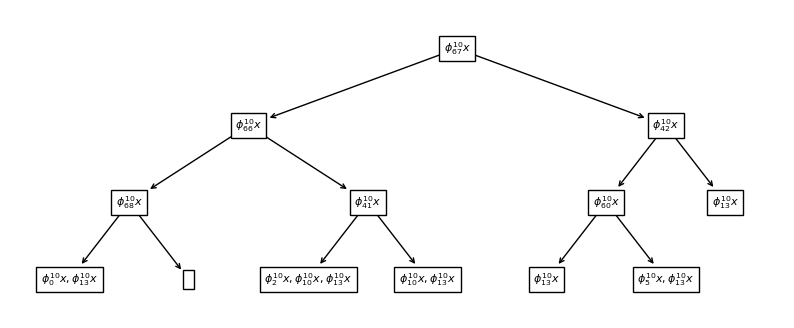

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10, 4))
expl.layer[-1].plot(axs, len(expl.layer))
plt.show()